In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy

plt.rcParams['axes.formatter.useoffset'] = False

In [2]:
# Open the data and get a subset
hdulist = fits.open('/grp/hst/hstlc/hst13902/outputs/composite/V-KL-UMA_FUV_G160M_1600_curve.fits', mode='readonly')
subset = np.where(56853 < hdulist[1].data['mjd'])
all_counts = hdulist[1].data['net'] # use flux for longer timescales, otherwise use net
all_times = hdulist[1].data['mjd']
counts, times = [], []
for count, time in zip(all_counts, all_times):
    if 56853.930 < time < 56853.955:
        counts.append(count)
        times.append(time)

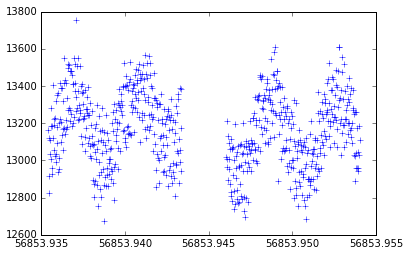

In [3]:
# Plot the sample
fig, ax = plt.subplots()
ax.plot(times, counts, 'b+')

**It appears that this object has a period of ~0.004 days, or ~6 minutes**

We should restrict ourselves to finding periods between the sampling time and the length of a few orbits (~96 mintues per orbit)

In [4]:
high_freq = (hdulist[0].header['STEPSIZE'] / (60. * 60. * 24.))
low_freq = (2 * 96.) / (60. * 24)

## Lomb-Scargle Periodogram via scipy

In [5]:
from scipy.signal import lombscargle

In [6]:
periods = np.linspace(high_freq, low_freq, len(times))
ang_freqs = 2 * np.pi / periods
power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), ang_freqs)
N = len(times)
power *= 2 / (N * np.asarray(counts).std() ** 2)

 (2.3148148148148147e-05, 0.13333333333333333),

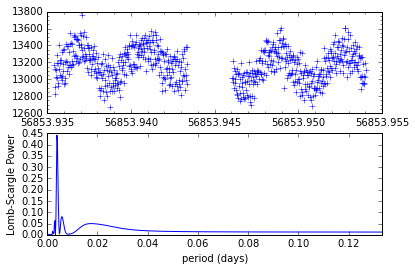

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power)
ax2.set(xlim=(high_freq, low_freq), xlabel='period (days)', ylabel='Lomb-Scargle Power')

## Lomb-Scargle Periodogram via gatspy

In [8]:
from gatspy.periodic import LombScargleFast

In [9]:
model = LombScargleFast().fit(times, counts)
periods, power = model.periodogram_auto(nyquist_factor=len(times))

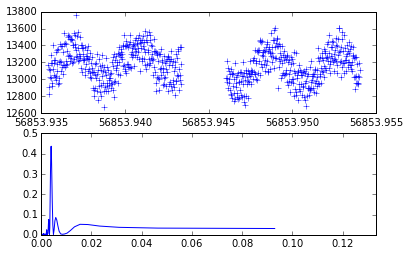

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power, linewidth=1.0)
ax2.set_xlim((high_freq, low_freq))
ax2.set_ylim((0.0, 0.5))
ax2.set_xlabel='period (days)'
ax2.set_ylabel='Lomb-Scargle Power'

In [11]:
model.optimizer.period_range=(high_freq, low_freq)
period = model.best_period
print period

Finding optimal frequency:
 - Estimated peak width = 338
 - Using 5 steps per peak; omega_step = 67.6
 - User-specified period range:  2.3e-05 to 0.13
 - Computing periods at 4018 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
0.00395771729846


## Lomb-Scargle Periodogram via astroML

In [12]:
from astroML.time_series import lomb_scargle

In [13]:
errors = [0.0001 for item in counts]
periods = np.linspace(high_freq, low_freq, len(times))
power = lomb_scargle(times, counts, errors, ang_freqs)

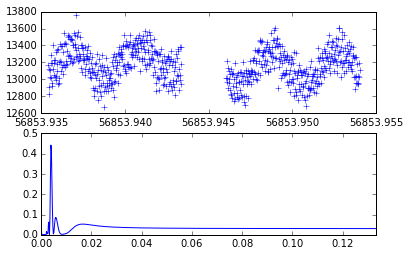

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power, linewidth=1.0)
ax2.set_xlim((high_freq, low_freq))
ax2.set_ylim((0.0, 0.5))
ax2.set_xlabel='period (days)'
ax2.set_ylabel='Lomb-Scargle Power'

## Try with more data!

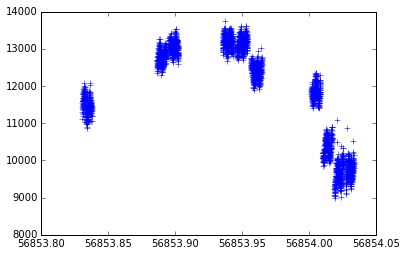

In [15]:
# Open the data and get a subset
counts, times = [], []
for count, time in zip(all_counts, all_times):
    if time > 56500:
        counts.append(count)
        times.append(time)

fig, ax = plt.subplots()
ax.plot(times, counts, 'b+')

In [16]:
periods = np.linspace(high_freq, low_freq, len(times))
ang_freqs = 2 * np.pi / periods
power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), ang_freqs)
N = len(times)
power *= 2 / (N * np.asarray(counts).std() ** 2)

 (2.3148148148148147e-05, 0.13333333333333333),

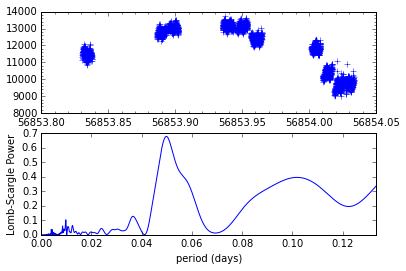

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power)
ax2.set(xlim=(high_freq, low_freq), xlabel='period (days)', ylabel='Lomb-Scargle Power')

## Try with noisy data

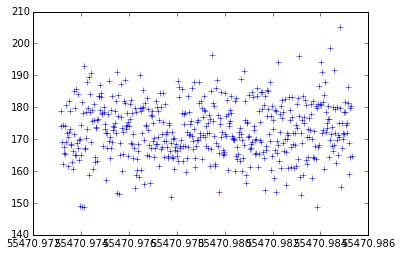

In [18]:
# Open the data and get a subset
hdulist = fits.open('/grp/hst/hstlc/hst13902/outputs/composite/SDSSJ155304.92+354828.6_FUV_G130M_1309_curve.fits', mode='readonly')
subset = np.where(56853 < hdulist[1].data['mjd'])
counts = hdulist[1].data['net'] # use flux for longer timescales, otherwise use net
times = hdulist[1].data['mjd']

counts = counts.byteswap().newbyteorder()
times = times.byteswap().newbyteorder()

# Plot the sample
fig, ax = plt.subplots()
ax.plot(times, counts, 'b+')

In [19]:
periods = np.linspace(high_freq, low_freq, len(times))
ang_freqs = 2 * np.pi / periods
power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), ang_freqs)
N = len(times)
power *= 2 / (N * np.asarray(counts).std() ** 2)

 (2.3148148148148147e-05, 0.13333333333333333),

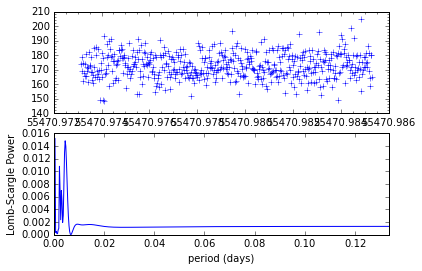

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power)
ax2.set(xlim=(high_freq, low_freq), xlabel='period (days)', ylabel='Lomb-Scargle Power')

## Automatically detect significant periods

In [21]:
# Open the data and get a subset
hdulist = fits.open('/grp/hst/hstlc/hst13902/outputs/composite/V-KL-UMA_FUV_G160M_1600_curve.fits', mode='readonly')
subset = np.where(56853 < hdulist[1].data['mjd'])
all_counts = hdulist[1].data['net'] # use flux for longer timescales, otherwise use net
all_times = hdulist[1].data['mjd']
counts, times = [], []
for count, time in zip(all_counts, all_times):
    if 56853.930 < time < 56853.955:
        counts.append(count)
        times.append(time)

In [22]:
periods = np.linspace(high_freq, low_freq, len(times))
ang_freqs = 2 * np.pi / periods
power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), ang_freqs)
N = len(times)
power *= 2 / (N * np.asarray(counts).std() ** 2)

In [23]:
# Find peak powers that are 3 sigma above mean
mean = np.mean(power)
std = np.std(power)
three_sigma = 3 * std
power_three_sigma = np.where(power > three_sigma)
period_three_sigma = np.where(power > three_sigma)
starting_index = power_three_sigma[0][0]
significant_periods = scipy.signal.argrelextrema(power[power_three_sigma], np.greater)
significant_periods_three_sigma = periods[[period + starting_index for period in significant_periods]]

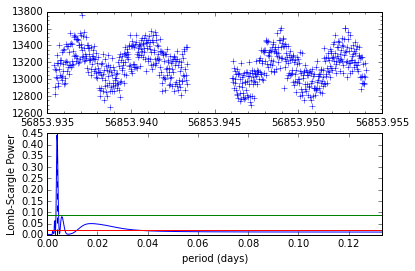

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power)
ax2.set(xlim=(high_freq, low_freq), xlabel='period (days)', ylabel='Lomb-Scargle Power')
ax2.axhline(mean, color='r', linestyle='-')
ax2.axhline(three_sigma, color='g', linestyle='-')
for period in significant_periods_three_sigma:
    ax2.axvline(period, color='k', linestyle='--')

## Try with noisy data


In [25]:
# Open the data and get a subset
hdulist = fits.open('/grp/hst/hstlc/hst13902/outputs/composite/SDSSJ155304.92+354828.6_FUV_G130M_1309_curve.fits', mode='readonly')
subset = np.where(56853 < hdulist[1].data['mjd'])
counts = hdulist[1].data['net'] # use flux for longer timescales, otherwise use net
times = hdulist[1].data['mjd']

counts = counts.byteswap().newbyteorder()
times = times.byteswap().newbyteorder()

In [26]:
periods = np.linspace(high_freq, low_freq, len(times))
ang_freqs = 2 * np.pi / periods
power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), ang_freqs)
N = len(times)
power *= 2 / (N * np.asarray(counts).std() ** 2)

In [27]:
# Find peak powers that are 3 sigma above mean
mean = np.mean(power)
std = np.std(power)
three_sigma = 3 * std
power_three_sigma = np.where(power > three_sigma)
period_three_sigma = np.where(power > three_sigma)
starting_index = power_three_sigma[0][0]
significant_periods = scipy.signal.argrelextrema(power[power_three_sigma], np.greater)
significant_periods_three_sigma = periods[[period + starting_index for period in significant_periods]]

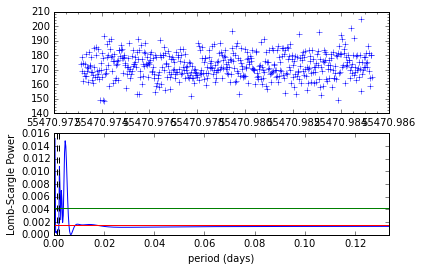

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(periods, power)
ax2.set(xlim=(high_freq, low_freq), xlabel='period (days)', ylabel='Lomb-Scargle Power')
ax2.axhline(mean, color='r', linestyle='-')
ax2.axhline(three_sigma, color='g', linestyle='-')
for period in significant_periods_three_sigma:
    ax2.axvline(period, color='k', linestyle='--')